In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from numpy.polynomial import Polynomial

In [2]:
np.random.seed(12345)
x = np.random.normal(0,1,(200))
y = x + 2 * x**2 - 2 * x**3 + np.random.normal(0,1,(200))

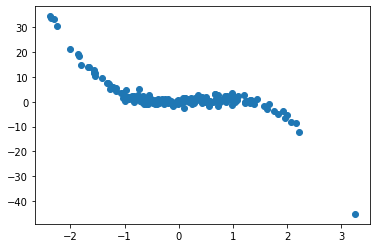

In [3]:
plt.scatter(x,y)

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
import random

In [5]:
random.seed(123)
cross_val_dict_123 = {}

for poly_val in range(1,6):
    poly_f = PolynomialFeatures(degree = poly_val, include_bias = True)
    x_poly = poly_f.fit_transform(x.reshape(-1,1))
    
    model = LinearRegression()
    
    cv = LeaveOneOut()
    
    cross_val_dict_123[poly_val] = cross_val_score(model, x_poly, y, scoring='neg_mean_squared_error', cv=cv).mean()

In [6]:
cross_val_dict_123

{1: -26.534996047663075,
 2: -32.53855587022528,
 3: -1.1079418003348256,
 4: -1.3234306760123546,
 5: -1.1099273761939197}

In [7]:
random.seed(12345)
cross_val_dict_12345 = {}

for poly_val in range(1,6):
    poly_f = PolynomialFeatures(degree = poly_val, include_bias = True)
    x_poly = poly_f.fit_transform(x.reshape(-1,1))
    
    model = LinearRegression().fit(x_poly, y)
    
    cv = LeaveOneOut()
    
    cross_val_dict_12345[poly_val] = cross_val_score(model, x_poly, y, scoring='neg_mean_squared_error', cv=cv).mean()

In [8]:
cross_val_dict_12345

{1: -26.534996047663075,
 2: -32.53855587022528,
 3: -1.1079418003348256,
 4: -1.3234306760123546,
 5: -1.1099273761939197}

Since we are splitting the dataset into n-1 (n is the total number of observations) segments, the order in which the parts appear doesn't affect the outcome using seeds 123 and 12345. Because of this, the outcomes are unaffected by the seed.

In [9]:
x_poly

array([[ 1.00000000e+00, -2.04707659e-01,  4.19052259e-02,
        -8.57832070e-03,  1.75604795e-03, -3.59476467e-04],
       [ 1.00000000e+00,  4.78943338e-01,  2.29386721e-01,
         1.09863242e-01,  5.26182678e-02,  2.52011688e-02],
       [ 1.00000000e+00, -5.19438715e-01,  2.69816579e-01,
        -1.40153177e-01,  7.28009861e-02, -3.78156507e-02],
       ...,
       [ 1.00000000e+00, -1.41341604e+00,  1.99774490e+00,
        -2.82364468e+00,  3.99098468e+00, -5.64092176e+00],
       [ 1.00000000e+00,  1.29660784e+00,  1.68119190e+00,
         2.17984660e+00,  2.82640619e+00,  3.66474043e+00],
       [ 1.00000000e+00,  2.52275209e-01,  6.36427810e-02,
         1.60554959e-02,  4.05040358e-03,  1.02181641e-03]])

In [10]:
df = pd.DataFrame(x_poly) # add the columns as x,x^2,x^3
df.head()

,0,1,2,3,4,5
0,1.0,-0.204708,0.041905,-0.008578,0.001756,-0.000359
1,1.0,0.478943,0.229387,0.109863,0.052618,0.025201
2,1.0,-0.519439,0.269817,-0.140153,0.072801,-0.037816
3,1.0,-0.555730,0.308836,-0.171630,0.095380,-0.053005
4,1.0,1.965781,3.864293,7.596353,14.932762,29.354534


The model with a 3rd degree polynomial produced the lowest cross validation score. Given that the relation between x and y is  a the same 3rd degree polynomial, I anticipated that the model would provide the highest score.

In [11]:
df.columns = ['β', 'x', 'x^2','x^3','x^4','x^5']

In [12]:
df.head()

,β,x,x^2,x^3,x^4,x^5
0,1.0,-0.204708,0.041905,-0.008578,0.001756,-0.000359
1,1.0,0.478943,0.229387,0.109863,0.052618,0.025201
2,1.0,-0.519439,0.269817,-0.140153,0.072801,-0.037816
3,1.0,-0.555730,0.308836,-0.171630,0.095380,-0.053005
4,1.0,1.965781,3.864293,7.596353,14.932762,29.354534
